In [1]:
#Import all Libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
file_name='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

#@title
%%HTML
<h3> Question1</h3><br><font=3>Display the data types of each column using the attribute dtype, then take a screenshot and submit it, include your cod0e in the image.</font> 

In [3]:
 print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


#@title
%%HTML
<h3>Question 2</h3><br>
<font=3>Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True</font>

In [4]:
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)

#@title
%%HTML
<h3>Question 3</h3>
<font=3>Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.</font>

In [5]:
sr = df['floors'].value_counts().to_frame()
print(sr)

     floors
1.0   10680
2.0    8241
1.5    1910
3.0     613
2.5     161
3.5       8


#@title
%%HTML
<h3>Question 4</h3>
<br>
<font=3>Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers </font>

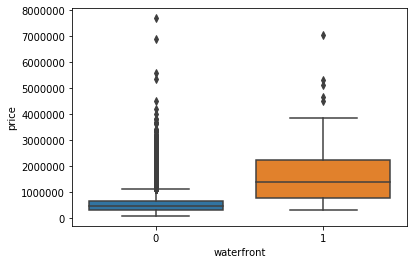

In [6]:
sns.boxplot(df['waterfront'],df['price'])

#@title
%%HTML
<h3>Question 5</h3>
<br>
<font=3>Use the function  regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.</font>

(0, 8086210.202611495)

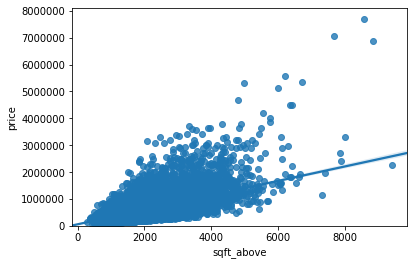

In [7]:
sns.regplot(x='sqft_above', y='price',data=df)
plt.ylim(0,)

In [67]:
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm
lm.fit(X,Y)
lm.score(X, Y)

0.49285321790379316

In [97]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
X = df[["floors", "waterfront","lat","sqft_basement" ,"view","sqft_living15","sqft_above","grade","sqft_living"]]
Y = df['price']
lm2 = LinearRegression()
X=X.values
Y=Y.values

In [98]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [99]:
lm2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
lm2.score(x_test,y_test)

0.6431055262683659

In [102]:
Input=[('scaler', StandardScaler())]

In [103]:
pipe=Pipeline(Input)

In [105]:
pipe.fit(X,Y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True))],
         verbose=False)

In [106]:
Rig = Ridge(alpha=0.1)
Rig.fit(x_train,y_train)
Rig.score(x_test,y_test)

0.6428458526147807

In [107]:
pf = PolynomialFeatures(degree=2)
x_train_pf = pf.fit_transform(x_train)
x_test_pf = pf.fit_transform(x_test)
rig = Ridge(alpha=0.1)
rig.fit(x_train_pf,y_train)
rig.score(x_test_pf,y_test)

0.7187024802924682